In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# Load data

In [2]:
%run get_data.ipynb

Top market cap symbols saved to data/top_cap.csv


Processing currencies: 100%|██████████| 58/58 [00:37<00:00,  1.55it/s]

Historical data saved to data/data.csv
Data range: 2023-06-19 00:00:00 to 2025-06-18 00:00:00


In [3]:
TODAY = date.today().strftime('%Y-%m-%d')
TODAY

'2025-06-18'

In [4]:
cap_df = pd.read_csv('data/top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2079460571547
1,ETHUSDT,Ethereum,304547319659
2,USDTUSDT,Tether,155566668588
3,XRPUSDT,XRP,126353470158
4,BNBUSDT,BNB,94463330995
...,...,...,...
95,OPUSDT,Optimism,948956079
96,SEIUSDT,Sei,938895718
97,METHUSDT,Mantle Staked Ether,936794682
98,XDCUSDT,XDC Network,935311084


In [5]:
df = pd.read_csv('data/data.csv')
df_vol = df[['timestamp', 'symbol', 'volume']].copy()

df_vol = df_vol.pivot(index='timestamp', columns='symbol', values='volume')
df_vol = df_vol.dropna(axis=1, how='any')
df_vol

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BTCUSDT,...,SOLUSDT,STXUSDT,SUIUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-19,50039.548,70893812.3,25084572.0,2830548.93,29777653.3,879121.04,1123434.72,22916.622,425074.269,35872.65974,...,1890318.270,15858994.1,70115654.4,2.039232e+08,912427.69,2.536328e+08,2.446264e+08,1.98481,23138226.0,322187608.0
2023-06-20,63899.431,109090810.6,24871528.0,3966378.64,66970269.6,1353659.52,1626750.24,39355.486,639069.672,69666.95525,...,3005581.720,59314289.2,85994336.2,3.500941e+08,1001445.09,4.432815e+08,2.801998e+08,16.50775,38186238.0,378325906.0
2023-06-21,100875.983,189786985.2,41814490.0,4624644.55,93746416.1,1678420.46,2738855.15,541394.240,1006328.557,108926.40412,...,4146918.990,67012108.6,94202270.2,3.843230e+08,1523320.50,5.427562e+08,3.875051e+08,17.06535,64042136.0,408749828.0
2023-06-22,106667.204,167726209.8,37603097.0,3638941.56,67981082.9,1394446.55,2240979.03,323358.509,1032630.471,59054.56460,...,3547312.430,49438262.7,86075057.7,2.801908e+08,1126010.49,4.093545e+08,5.786912e+08,4.39823,58491918.0,442729597.0
2023-06-23,68728.286,117254934.0,37706286.0,3698984.70,67068115.5,1035964.33,2283130.73,787313.759,638290.193,73931.89635,...,4851596.520,50107845.8,60864747.1,2.415919e+08,854320.28,4.280140e+08,1.709201e+09,9.96990,49236446.0,345391930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-14,166336.995,57750191.8,24120411.0,2428687.95,50905874.8,920527.91,1096166.12,34424.810,93690.143,8798.93969,...,1679994.751,3802657.3,50089702.7,1.627638e+08,5833384.80,3.921939e+08,1.328390e+08,62.01518,25309710.0,67644610.7
2025-06-15,98219.224,44666279.5,22414180.0,2474883.89,60734814.2,891381.76,1025408.30,75780.609,79324.646,7164.20047,...,2831999.616,3559036.6,27407251.2,1.557125e+08,5834362.72,5.044200e+08,1.294540e+08,55.75567,21441243.0,46595619.5
2025-06-16,249880.545,99602152.2,28578696.0,3471978.49,89399833.0,1232673.82,2053892.52,84831.992,124203.787,14922.66540,...,3573196.785,5196042.6,43292182.4,1.149785e+09,15493186.39,1.424853e+09,1.836434e+08,132.61558,58093957.0,180775839.0


In [6]:
df = df[['timestamp', 'symbol', 'close']]

df = df.pivot(index='timestamp', columns='symbol', values='close')
df = df.dropna(axis=1, how='any')
df


symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BTCUSDT,...,SOLUSDT,STXUSDT,SUIUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-19,51.96,0.2634,0.1165,6.9392,1.0073,8.599,11.47,106.8,243.10,26844.35,...,16.10,0.5933,0.7851,0.06999,4.481,1.0002,0.01516,26733.78,0.0800,0.4936
2023-06-20,53.10,0.2705,0.1214,7.2154,1.0834,8.770,12.12,110.0,247.70,28307.99,...,16.64,0.7491,0.8189,0.07057,4.572,0.9998,0.01559,28350.00,0.0827,0.4929
2023-06-21,55.02,0.2862,0.1258,7.4541,1.1405,9.038,12.90,135.9,248.80,29993.89,...,17.23,0.8189,0.8312,0.07233,4.772,1.0000,0.01642,30077.08,0.0868,0.4999
2023-06-22,55.60,0.2899,0.1248,7.3567,1.0873,9.002,12.65,133.5,240.80,29884.92,...,16.62,0.7746,0.8030,0.07226,4.732,0.9997,0.01686,30032.31,0.0867,0.4938
2023-06-23,57.10,0.2966,0.1351,7.6645,1.1350,9.310,13.29,182.2,244.30,30688.50,...,17.13,0.7658,0.7984,0.07315,4.860,0.9994,0.01876,30612.75,0.0895,0.4961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-14,275.11,0.6247,0.1771,4.4590,0.3333,4.087,18.93,430.9,645.61,105414.64,...,144.64,0.6270,2.9470,0.27110,7.302,0.9994,0.02206,105399.14,0.2564,2.1394
2025-06-15,274.97,0.6334,0.1766,4.5380,0.3278,4.093,19.10,460.4,648.19,105594.01,...,152.97,0.6220,3.0233,0.27390,7.180,0.9997,0.02226,105570.71,0.2587,2.1655
2025-06-16,275.12,0.6303,0.1759,4.6850,0.3185,4.141,19.06,463.7,650.74,106794.53,...,150.72,0.6380,2.9962,0.27410,7.446,0.9994,0.02221,106733.71,0.2616,2.2380


# Solver

In [7]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=90, max_last_days=180, step_day=10,
                            min_procent=0.01, max_procent=0.3, step_procent=0.01,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in tqdm(symbol_list, desc='Processing Symbols'):
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        last_price = df[symbol].iloc[-1]

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()
            df_warning_100 = df[symbol].iloc[-100:]
            df_warning_30 = df[symbol].iloc[-30:]

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].min()
                    min_historical_coeff = min_historical * (procent + 1.0)
                    min_support_100 = df_warning_100.min()
                    min_support_30 = df_warning_30.min()
                    max_historical = df[symbol].max()
                    max_resist_100 = df_warning_100.max()
                    max_resist_30 = df_warning_30.max()
                    mean_100 = df_warning_100.mean()
                    mean_30 = df_warning_30.mean()

                    if (df_slice.std() <= std_n) and (mean_val <= min_historical_coeff) and (last_price >= min_support_30):

                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        if symbol != 'BTCUSDT':
            if (optimal_procent == max_procent) & (optimal_last_days == min_last_days) & (optimal_std_procent == max_std_procent):
                continue

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, 
                           min_support_100, min_support_30, min_historical, 
                           max_historical, max_resist_100, max_resist_30, 
                           last_price, mean_100, mean_30)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 
                       'Min Support 100', 'Min Support 30', 'Min Historical', 
                       'Max Historical', 'Max Resist 100', 'Max Resist 30', 
                       'Last Price', 'Mean 100', 'Mean 30']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [8]:
optimal_symbol = find_optimal_parameters(df, symbol_list=None,
                                         min_last_days=90, max_last_days=180, step_day=10,
                                         min_procent=0.01, max_procent=0.3, step_procent=0.01,
                                         min_std_procent=0.01, max_std_procent=0.3, step_std=0.01)

Processing Symbols: 100%|██████████| 37/37 [00:19<00:00,  1.91it/s]


In [9]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [10]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support 100,Min Support 30,Min Historical,Max Historical,Max Resist 100,Max Resist 30,Last Price,Mean 100,Mean 30
APTUSDT,0.19,100.0,0.09,4.348,4.404,4.348,18.0702,6.138,5.715,4.404,5.15327,4.919267
FILUSDT,0.20,90.0,0.09,2.266,2.366,2.266,11.4520,3.245,3.085,2.366,2.73417,2.633667
ETCUSDT,0.22,90.0,0.09,14.070,16.290,14.070,38.2700,20.700,19.690,16.380,17.21250,17.596667
DOTUSDT,0.24,90.0,0.11,3.378,3.696,3.378,11.5580,5.309,4.948,3.696,4.18903,4.180233
ATOMUSDT,0.25,110.0,0.08,3.884,4.002,3.580,14.2220,5.384,5.219,4.002,4.48484,4.451500
BTCUSDT,0.30,90.0,0.30,76322.420,101508.680,25162.520,111696.2100,111696.210,111696.210,104591.040,94845.98660,106637.354000
OPUSDT,0.30,90.0,0.13,0.553,0.553,0.553,4.6970,0.921,0.812,0.553,0.73038,0.667400


In [11]:
result = optimal_symbol.index.to_list()

In [12]:
result

['APTUSDT', 'FILUSDT', 'ETCUSDT', 'DOTUSDT', 'ATOMUSDT', 'BTCUSDT', 'OPUSDT']

# Побудова графіку

In [23]:
def paint_result(df, result, info_df, cap_df, volume_df, last_days=365):
    num_symbols = len(result)
    fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(16, 6 * num_symbols), sharex=False)

    if num_symbols == 1:
        axes = [axes]

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        volume_series = volume_df[symbol].iloc[-last_days:]
        ax = axes[idx]

        # ==== Графік ціни ====
        series.plot(ax=ax, label='Price', color='gray', linewidth=1.0)

        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0] / 1_000_000_000
        min_support_100 = info_df.loc[symbol, 'Min Support 100']
        max_resist_100 = info_df.loc[symbol, 'Max Resist 100']
        min_support_30 = info_df.loc[symbol, 'Min Support 30']
        max_resist_30 = info_df.loc[symbol, 'Max Resist 30']
        last_price = info_df.loc[symbol, 'Last Price']

        TP = (max_resist_100 + max_resist_30) / 2
        profit_pct = ((TP - last_price) / last_price) * 100
        min_historical = info_df.loc[symbol, 'Min Historical']
        SL = min_historical * 0.8

        ax.axhspan(min_support_100, max_resist_100, color='lightgreen', alpha=0.1)
        ax.axhspan(max_resist_30, max_resist_100, color='red', alpha=0.1)

        ax.axhline(min_support_100, color='gray', linestyle='dotted',
                   label=f"Min Support 100 ({min_support_100:.2f})")
        ax.axhline(min_support_30, color='orange', linestyle='--',
                   label=f"Min Support 30 ({min_support_30:.2f})")
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--',
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(max_resist_100, color='gray', linestyle='dotted',
                   label=f"Max Resist 100 ({max_resist_100:.2f})")
        ax.axhline(max_resist_30, color='gray', linestyle='dotted',
                   label=f"Max Resist 30 ({max_resist_30:.2f})")
        ax.axhline(last_price, color='green', linestyle='--',
                   label=f"Last Price ({last_price:.2f})")
        ax.text(series.index[-1], last_price, f' {last_price:.2f}', 
                verticalalignment='bottom', color='green', fontsize=10)
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--',
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")
        ax.axhline(info_df.loc[symbol, 'Mean 100'], color='black', linestyle='-', linewidth=0.5,
                    label=f"Mean 100 ({info_df.loc[symbol, 'Mean 100']:.2f})")

        # ==== Найбільший обʼєм за останні 100 днів ====
        vol_max_idx_100 = volume_series[-100:].idxmax()
        vol_mean_100 = volume_series[-100:].mean()
        if volume_series[vol_max_idx_100] > vol_mean_100 * 3:
            price_at_vol_max_100 = series.loc[vol_max_idx_100]
            pos_100 = series.index.get_loc(vol_max_idx_100)

            ax.text(pos_100, price_at_vol_max_100, f' {price_at_vol_max_100:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Найбільший обʼєм за останні 30 днів ====
        vol_max_idx_30 = volume_series[-30:].idxmax()
        vol_mean_30 = volume_series[-30:].mean()
        if volume_series[vol_max_idx_30] > vol_mean_30 * 3:
            price_at_vol_max_30 = series.loc[vol_max_idx_30]
            pos_30 = series.index.get_loc(vol_max_idx_30)

            ax.text(pos_30, price_at_vol_max_30, f' {price_at_vol_max_30:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Лінії часу ====
        if len(series) >= 100:
            pos_30 = len(series) - 30
            pos_100 = len(series) - 100
            
            ax.axvline(pos_30, color='gray', linestyle=':', label='30 Days Ago')
            ax.axvline(pos_100, color='gray', linestyle=':', label='100 Days Ago')

        # ==== Накладання обʼєму ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}% (SL: {SL:.2f}, TP: {TP:.2f})", fontsize=14)
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

    plt.tight_layout()
    plt.savefig(f'pdf_store/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(f'/Users/aleksejkitajskij/Library/Mobile Documents/com~apple~CloudDocs/bit_research/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

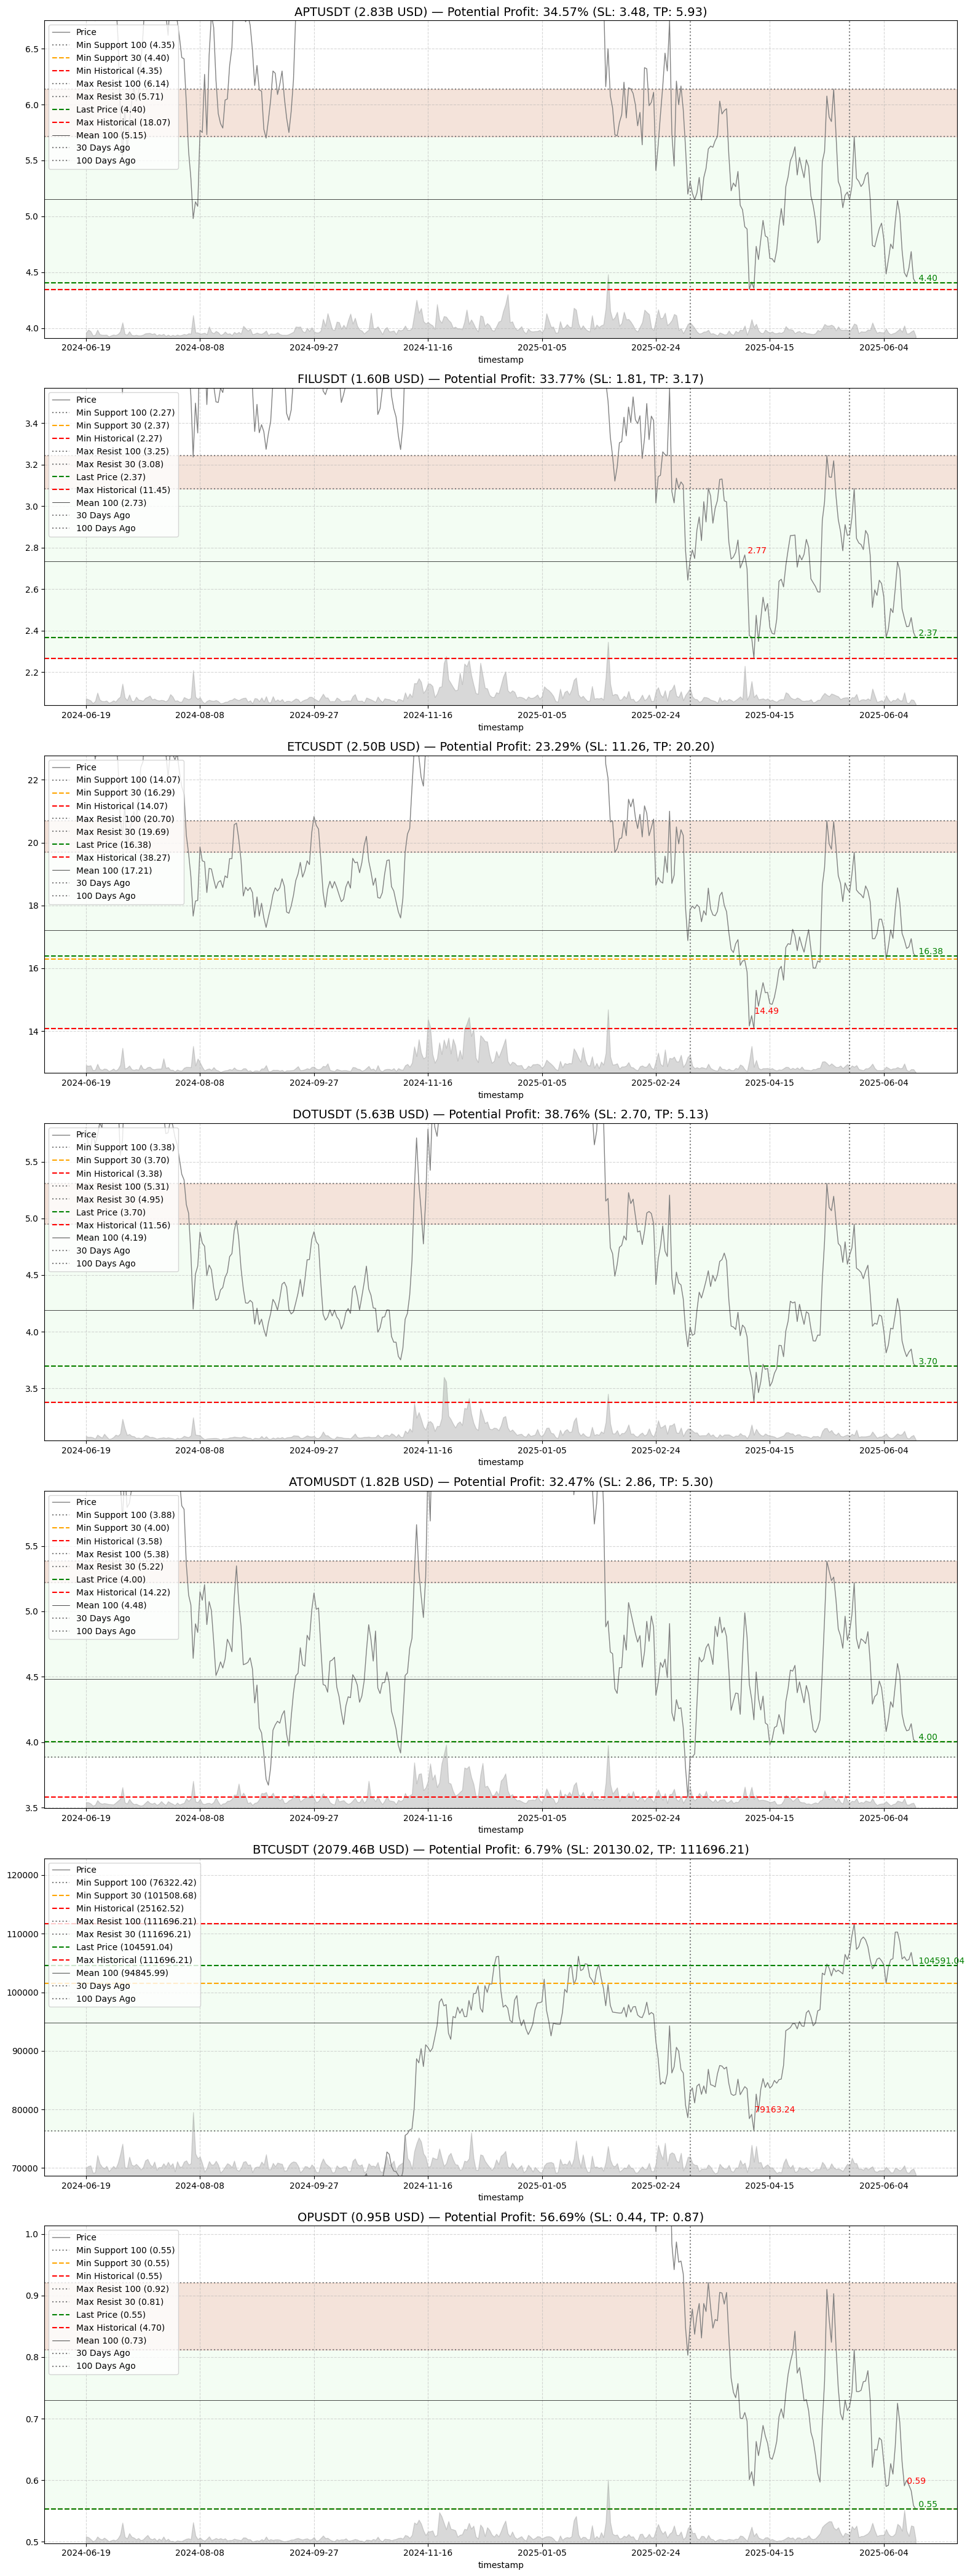

In [24]:
paint_result(df, result, optimal_symbol, cap_df, df_vol, last_days=365)